# ## Comparing the efficiency of Python loops with vectorisation [25 points]


## Fill in 2D Numpy array recursively, and compute execution times.

M is a 2D array with dimensions $N \times N$, where $N > 1$ is an integer. It is defined as following. The first column is just the set of numbers 0, 1, ... N-1. The first row of elements is zero. The rest of the array is computed via a recrsive formula in which the element is equal to the sum of (a) the one just above and (b) also the element above and to the left. The figure below illustrates this: to compute the value of the element in the red oval, we add the two elements in the blue box.

<div class="clearfix" style="padding: 10px; padding-left: 0px">
<img src="2nd_Ass_matrix_problem.png" width="300px" class="pull-left" style="display: inline-block; margin: 0px;">
</div>

* (1) For any $N$, define a function $F_1$ that would implement this recursive process, filling in M, by **using two `for` loops** to loop over columns and rows. Print your resulting matrix M1 for $N=8$. [4]

* (2) Define another function $F_2$ that achieves the same goal **but uses only one `for` loop** to go over rows of M2. That is, for each row, start from the left of it, and fill the row in by going to the right end of the row. Print your resulting matrix M2. [4]

* (3) Visualise matrix M1 for some value of $N$, e.g., $N=10$, with `imgshow`. [3]

* (4) In the rest of the Task we measure code efficiency of the two methods as a function of the number of elements in the matrix. Define an array $N_t = 2^i$, where $i = 0, 1, 2, ... 12$. For each value of $N_t$ find the matrices $M_1$, $M_2$ (**do not print them as they become large**), and the time it took your code to do so, $t_1(N_t)$ and $t_2(N_t)$. Print your $t_N$ in a clear fashion. [3]

* (5) Plot the resulting execution times $t_1$ and $t_2$ versus $N_t$. Try to make your plot as clear as possible. Analyse your results, and make **quantitative** conclusions about how large $t_1$ and $t_2$ would be for a very large $N_t$, e.g. $N_t = 10^5$. [11]

In [13]:
#Task2: Matrix M2

N= int(input("Enter the nmber of rows/columns:"))

def F2(N):
    M2=np.zeros((N*N),int)
    for i in range(N,N*N):
        if(i%N==0):
            M2[i]=i/N
        else:
            M2[i]=M2[i-(N+1)]+M2[i-N]
    M2=np.reshape(M2,(N,N))
    return(M2)
F2(N)

Enter the nmber of rows/columns:8


array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  0],
       [ 3,  3,  1,  0,  0,  0,  0,  0],
       [ 4,  6,  4,  1,  0,  0,  0,  0],
       [ 5, 10, 10,  5,  1,  0,  0,  0],
       [ 6, 15, 20, 15,  6,  1,  0,  0],
       [ 7, 21, 35, 35, 21,  7,  1,  0]])

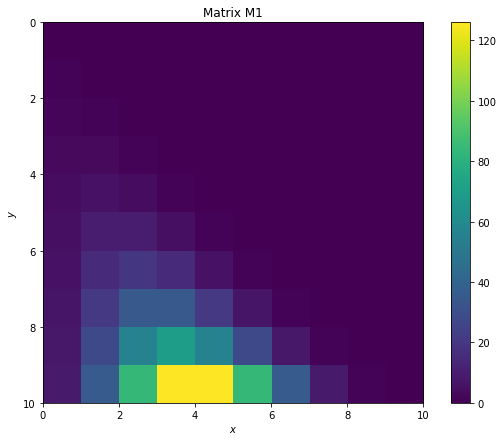

In [14]:
#Task3: Matrix M1 Visualisation
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.imshow(F1(10), extent = [0,10,10,0])
#plt.imshow(F1(10))
plt.colorbar()
plt.title('Matrix M1')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

In [19]:
#Task4: Execution time(t1) for F1
import time
import warnings
warnings.filterwarnings('ignore')
t1 = time.time() # calculate the execution time for the code
N1=[]
T1=[]

for i in range(13):
    N_t=2**i
    ti = time.time()
    F1(N_t)
    N1.append(N_t)
    T1.append(time.time() - ti)
print("Execution time for respective N_t:" ,T1)
print("Exection time for F1:","%s seconds" % (time.time() - t1))


Execution time for respective N_t: [0.0, 0.0, 0.0009791851043701172, 0.0, 0.0, 0.0009999275207519531, 0.0029888153076171875, 0.011966228485107422, 0.05588197708129883, 0.19148802757263184, 0.7699172496795654, 3.339329242706299, 12.542363405227661]
Exection time for F1: 16.915914058685303 seconds


In [20]:
#Task4: Execution time(t2) for F2
import time
import warnings
warnings.filterwarnings('ignore')
t2 = time.time()
N2=[]
T2=[]
for i in range(13):
    N_t=2**i
    ti = time.time()  
    F2(N_t)
    N2.append(N_t)
    T2.append(time.time() - ti)
print("Execution time for respective N_t:" ,T2)
print("Exection time for F2:","%s seconds" % (time.time() - t2))

Execution time for respective N_t: [0.0, 0.0, 0.0, 0.0, 0.0010292530059814453, 0.001001596450805664, 0.0039861202239990234, 0.012935161590576172, 0.051856279373168945, 0.22439908981323242, 0.8348488807678223, 2.981532573699951, 11.297597885131836]
Exection time for F2: 15.410135746002197 seconds


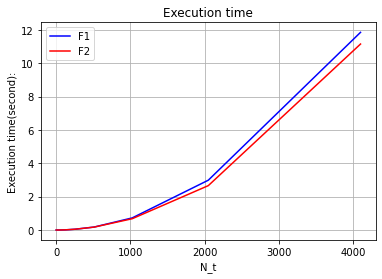

In [7]:
#Task5:Plotting execution times t1 and t2 versus  N_t

plt.show()
plt.plot(N1,T1,color='b',label="F1")
plt.plot(N2,T2,color='r',label="F2")
plt.legend()
plt.grid()

plt.xlabel("N_t")

plt.ylabel("Execution time(second):")

plt.title("Execution time")

plt.show()

Conclusion : The execution time taken for constructing Matrices M1 and M2 respectively using F1 and F2 is 16.9159140 seconds and  15.410135 seconds. Since F1 consist 2 for loops execution time for F1 is almost 10% higher than F2.

In [9]:
#Task5: Execution time for N=10 ^ 4

N=10**4
t1 = time.time()
F1(N)
t2=time.time()
F2(N)
print("Execution time for F1 for N=10^4:","%s seconds" % (time.time() - t1))
print("Execution time for F2 for N=10^4:","%s seconds" % (time.time() - t2))

Execution time for F1 for N=10^4: 142.70575881004333 seconds
Execution time for F2 for N=10^4: 66.94597887992859 seconds
